# 1. 문제 정의

PUBG사로부터 제공받은 다양한 데이터를 통해 사용자가 몇 등으로 게임을 종료하게 될 지 예측해본다. 

# 2. 데이터 수집

분석에 필요한 데이터 불러오기

In [151]:
#프로젝트 진행에 필요한 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
#PUBG 게임 유저의 데이터 파일 불러오기
sample_submission = pd.read_csv('./data/sample_submission_V2.csv')
train = pd.read_csv('./data/train_V2.csv')
test = pd.read_csv('./data/test_V2.csv')

- 컬럼에 대한 간단한 설명


|datafield|설명|
|-------|--------|
|Id	|플레이어 ID|
|groupId|	매치 내 그룹 아이디, 동일 그룹 구성원들이 다른 게임을 할 때마다 새로운 그룹 아이디가 부여됨|
|matchId|	매치 ID (트레이닝 데이터와 테스트 데이터에 동일한 매치 ID는 없음)|
|assists|	아군이 킬했을 때 같이 데미지를 넣은 수 (말 그대로 어시스트)|
|boosts|부스트 아이템 사용 횟수|
|damageDealt|	총 넣은 데미지 (단, 팀에 준 피해나 자해는 포함되지 않음)|
|DBNOs(Down But Not Out)|	적을 기절시켰으나, 적 팀원에 의해 부활되어 실제로는 킬로 처리되지 않은 횟수|
|headshotKills|	헤드샷 킬 수|
|heals|	힐링 아이템 사용 횟수|
|killPlace|	매치에서의 킬 횟수 순위|
|killPoints|	킬 수로 산정한 Elo의 개념. 만약 rankPoints에 -1 이외의 값이 있다면, killPoints의 0값은 값이 없는 것으로 처리됨.|
|kills	|총 킬 수|
|killStreaks|	짧은 시간동안 최대한 많이 킬했을 때의 킬 수|
|longestKill	|킬과 킬 사이의 이동한 가장 긴 거리|
|matchDuration|	매치의 시간 (초 단위)|
|matchType|	매치 타입 “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; 나머지는 이벤트 또는 커스텀 매치|
|maxPlace	|매치 내에서 최악의 등수|
|numGroups|	게임 내 총 그룹 수 (솔로 -> 듀오 -> 스쿼드로 갈 수록 줄어듦)|
|rankPoints|	랭킹 Elo의 개념|
|revives|	아군 부활 횟수|
|rideDistance	|탈것으로 이동한 총 거리|
|roadKills|	탈것으로 킬한 횟수|
|swimDistance	|수영한 총 거리|
|teamKills|	팀킬 횟수|
|vehicleDestroys|	차량 폭파 횟수|
|walkDistance|	걸어간 총 거리|
|weaponsAcquired|	얻은 무기의 수|
|winPoints|	승리 횟수로 판단한 Elo의 개념|
|**winPlacePerc**	|예측 목표, 1에 가까워질 수록 순위가 높아진다. (0부터 1까지의 값으로 나타냄. 1은 1등을, 0은 꼴등을 의미한다.)|


# 3. 데이터 탐색

## 1) 데이터 정제

In [153]:
#데이터 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### - 결측치 확인

In [154]:
#결측치 확인
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

결측치 확인 결과, 'wimPlacePerc'컬럼에서 1개의 결측치가 확인되었다.
해당 데이터 확인 후 제거해도 문제 없을 시 제거해준다.

In [155]:
#데이터를 살펴본 결과, 큰 정보가 없어서 제거해도 문제 없을 것 같다.
#winPlacePerc가 누락된 데이터 1개 제거
train = train.dropna(subset=['winPlacePerc'])
pd.set_option('display.max_columns',None)
train

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0               0.00      0              0      0         60        1241   
1              91.47      0              0      0         57           0   
2              68.00      0              0      0         47           0   
3              32.90      0              0      0         75           0   
4             100.00      0              0      0         45           0   
...              ...    ...            ...    ...        ...         ...   
4446961         0.00      0              0      0         74        1029   
4446962        44.15      0              0      0         69           0   
4446963        59.06      0              0      0         66           0   
4446964       180.40      1              1      2         11           0   
4446965       268.00      0              0      1         18           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0            0            0         0.00           1306  squad-fpp        28   
1            0            0         0.00           1777  squad-fpp        26   
2            0            0         0.00           1318        duo        50   
3            0            0         0.00           1436  squad-fpp        31   
4            1            1        58.53           1424   solo-fpp        97   
...        ...          ...          ...            ...        ...       ...   
4446961      0            0         0.00           1873  squad-fpp        29   
4446962      0            0         0.00           1435       solo        93   
4446963      0            0         0.00           1321  squad-fpp        28   
4446964      2            1        98.50           1373  squad-fpp        26   
4446965      2            1        78.25           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0        0.0000          0   
1               25        1484        0        0.0045          0   
2               47        1491        0        0.0000          0   
3               30        1408        0        0.0000          0   
4               95        1560        0        0.0000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0     1292.0000          0   
4446962         93        1501        0        0.0000          0   
4446963         28        1500        0        0.0000          0   
4446964         25        1418        2        0.0000          0   
4446965         94        1590        0     1369.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0               0.000          0                0        244.80   
1              11.040          0                0       1434.00   
2               0.000          0                0        161.80   
3               0.000          0                0        202.70   
4               0.000          0                0         49.75   
...            

In [156]:
train[train['winPlacePerc'].isnull()]

Empty DataFrame
Columns: [Id, groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc]
Index: []

In [157]:
sample_submission.isna().sum()

Id              0
winPlacePerc    0
dtype: int64

In [158]:
test.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

### - 불필요해 보이는 컬럼 1차 제거

In [159]:
#id는 승률에 영향을 끼치지 않으므로 제거
train = train.drop(['Id','groupId','matchId'],axis=1)
test = test.drop(['Id','groupId','matchId'],axis=1)

In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        object 
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(19), object(1)
memory

### - 변수 분류하기
- binary


- category

matchType, numGroups

- numeric

assists, boosts, dammageDealt, headshotKills, heals, killPlace, killPoints, kills
, killStreaks, longestKill, matchDuration, rankPoints, revives, rideDistance, roadKills
, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints
, winPlacePerc

## 2) EDA

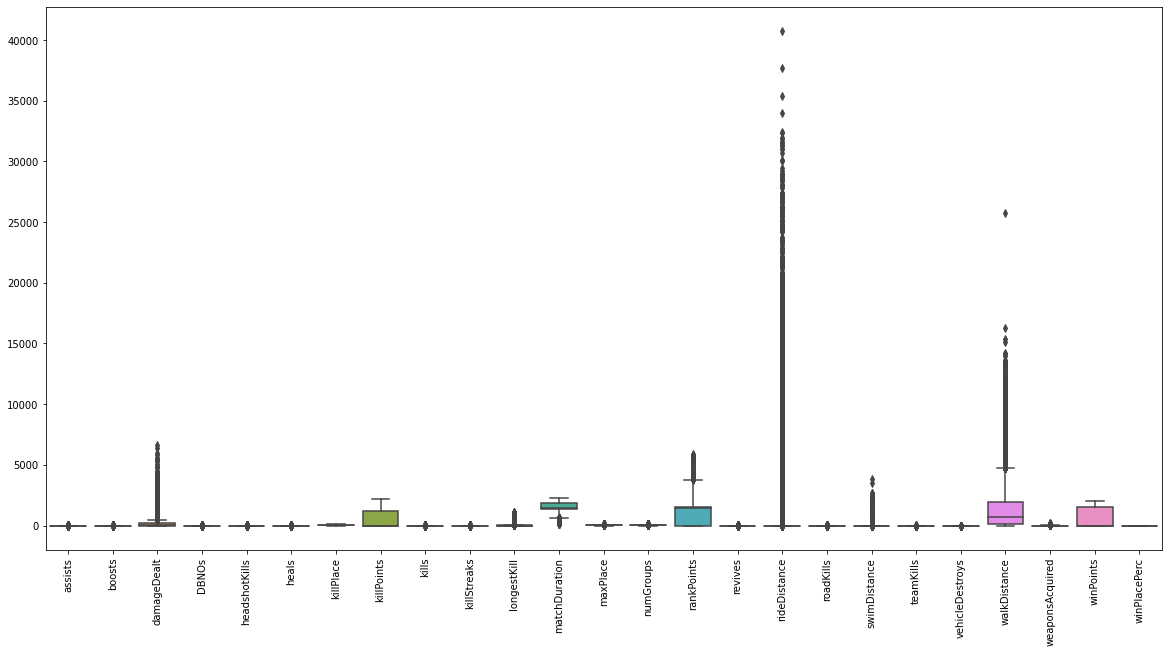

In [161]:
#박스플롯으로 전체적인 데이터 분석
fig,ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = train)
plt.xticks(rotation=90)
plt.show()

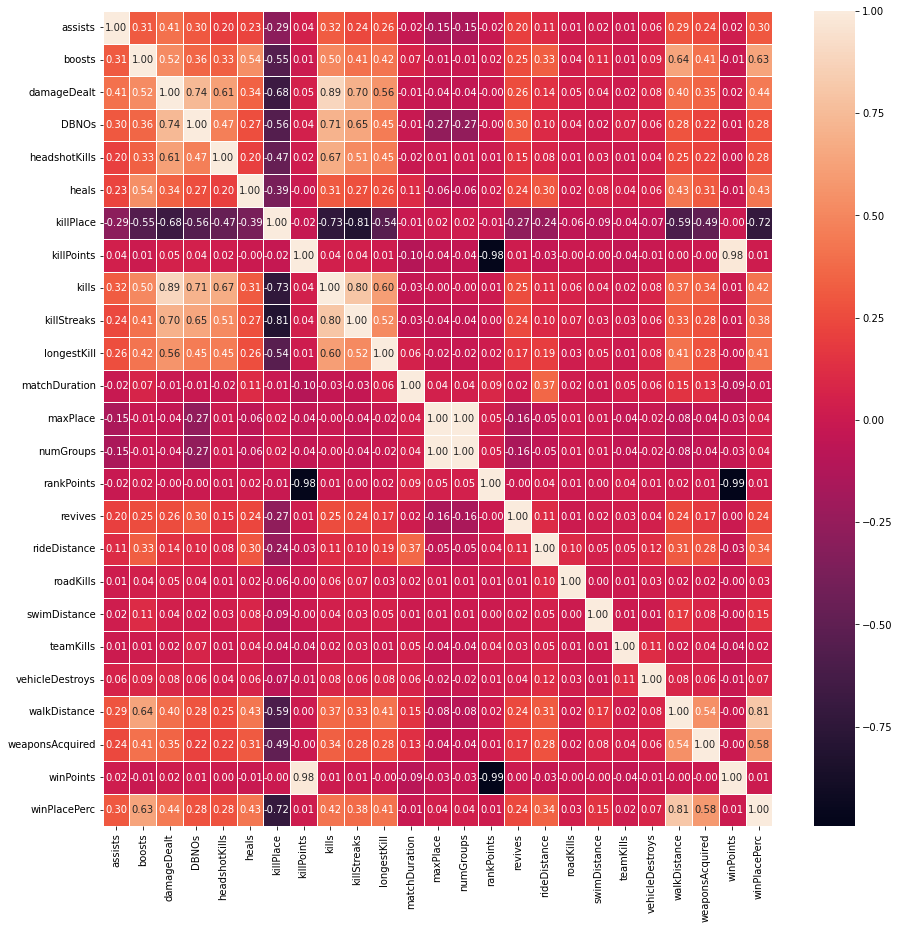

In [162]:
#feature별 상관관계 비교
fig,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

'killPoint' 와 'winPoint'는 양의 상관관계를 보이고, 다른 컬럼과도 비슷한 상관관계를 보인다.
'rankPoint'와는 음의 상관관계를 보인다.

'maxPlace' 와 'numGroups'는 동일한 컬럼이라고 봐도 무방하다. 둘 중 하나를 제거해주도록 한다.  

## - Kill 관련 feature (9개)

### (1) damageDealt

총 넣은 데미지 (단, 팀에 준 피해나 자해는 포함되지 않음)

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



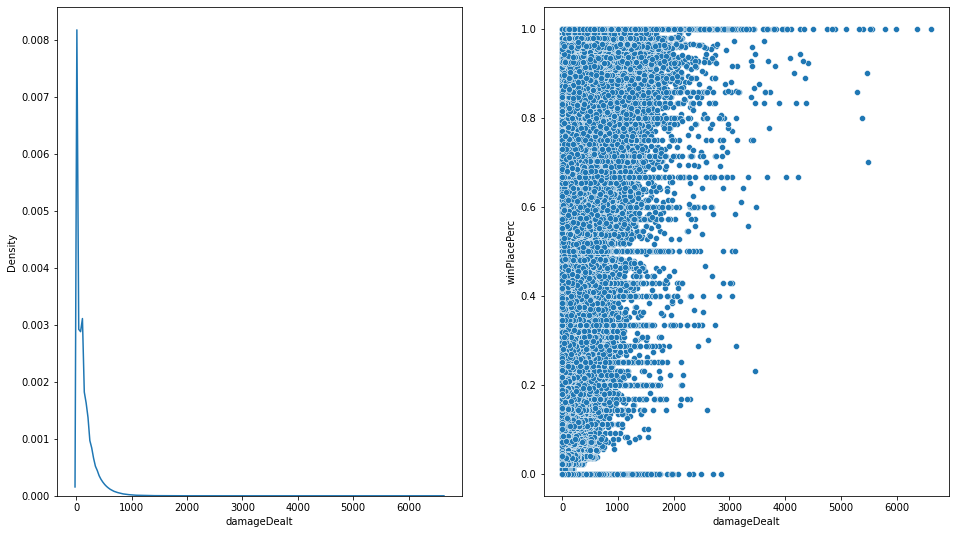

In [206]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'damageDealt')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'damageDealt', y = 'winPlacePerc')
plt.show()

### (2) DBNOs(Down But Not Out)

적을 기절시켰으나, 적 팀원에 의해 부활되어 실제로는 킬로 처리되지 않은 횟수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



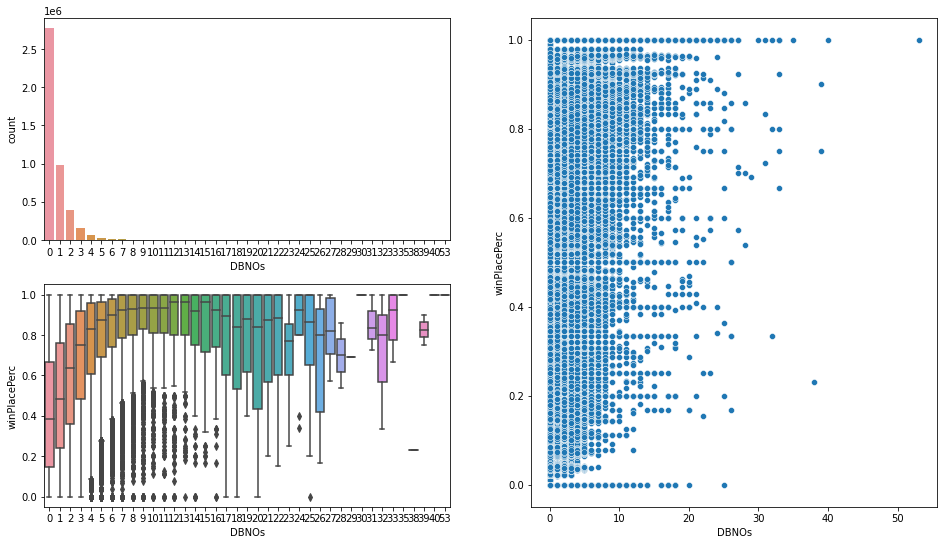

In [163]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'DBNOs', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'DBNOs')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'DBNOs', y = 'winPlacePerc')
plt.show()

### (3) headshotKills

헤드샷 킬 수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



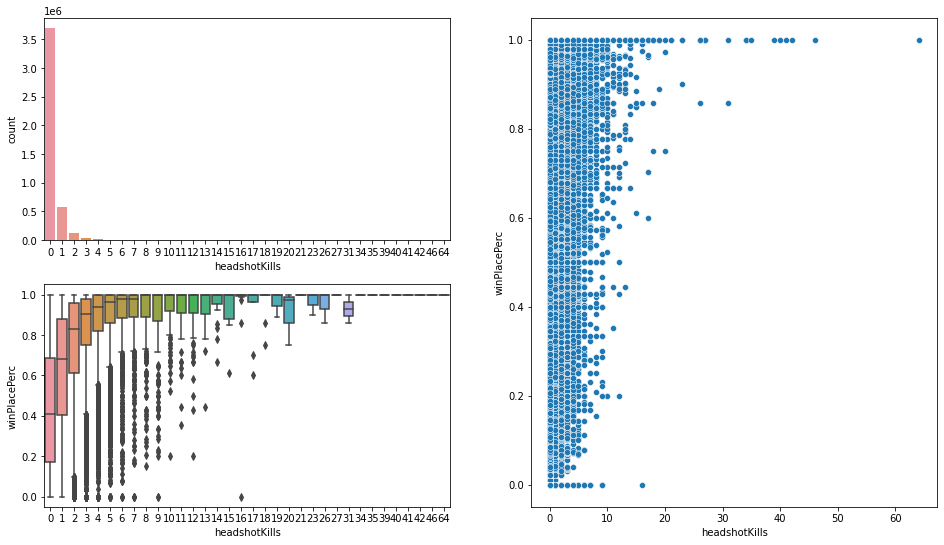

In [164]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'headshotKills', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'headshotKills')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'headshotKills', y = 'winPlacePerc')
plt.show()

### (4) killPlace

매치에서의 킬 횟수 순위

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



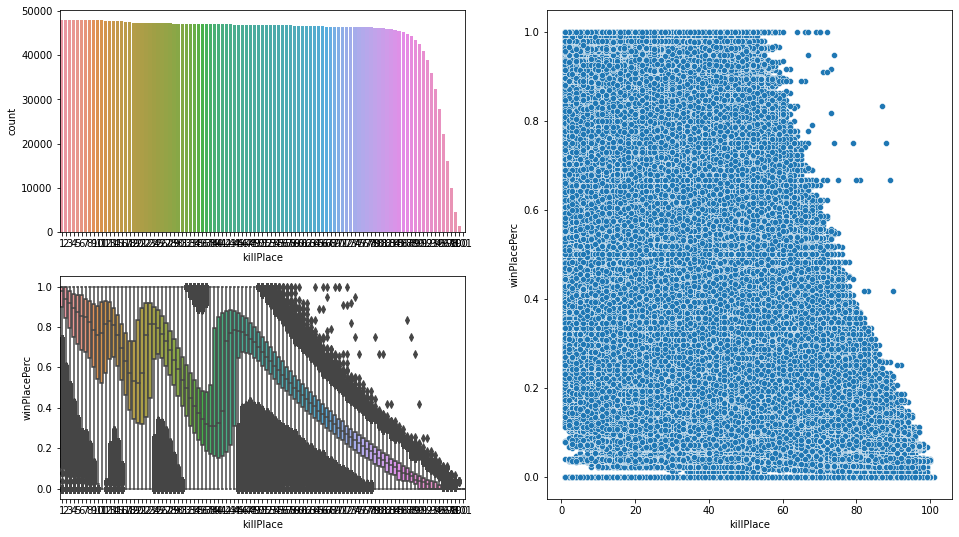

In [165]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'killPlace', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'killPlace')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'killPlace', y = 'winPlacePerc')
plt.show()

### (5) killPoints

킬 수로 산정한 Elo의 개념. 
만약 rankPoints에 -1 이외의 값이 있다면, killPoints의 0값은 값이 없는 것으로 처리됨.

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



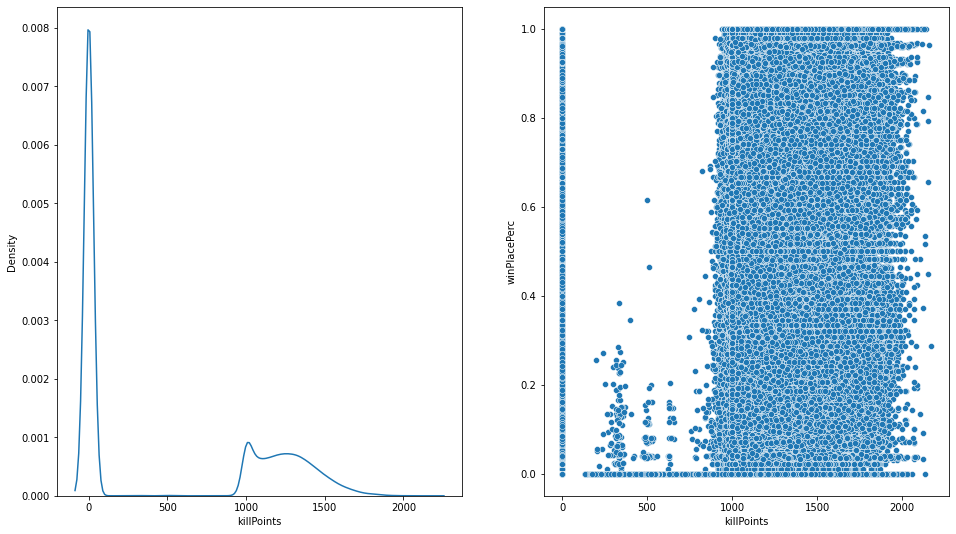

In [205]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'killPoints')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'killPoints', y = 'winPlacePerc')
plt.show()

### (6) kills

총 킬 수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



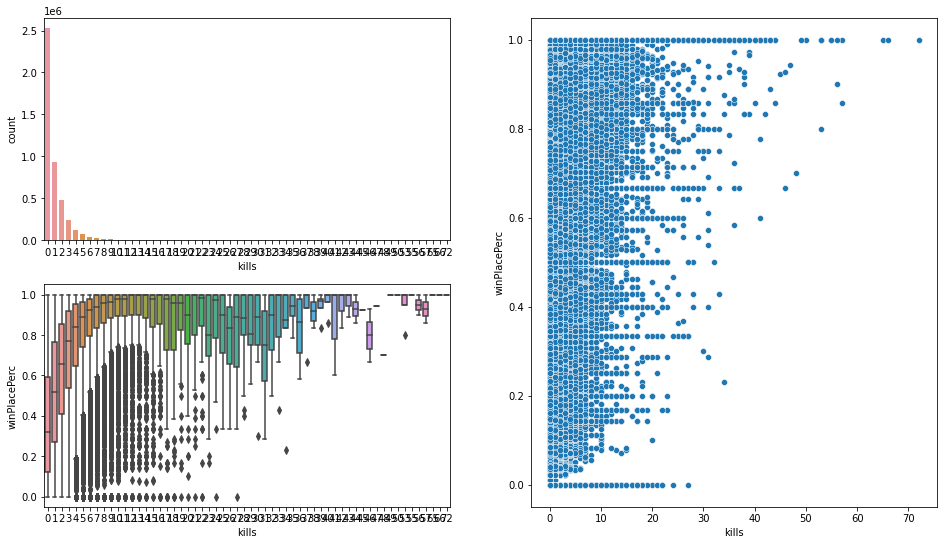

In [167]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'kills', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'kills')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'kills', y = 'winPlacePerc')
plt.show()

### (7) killStreaks

짧은 시간동안 최대한 많이 킬했을 때의 킬 수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



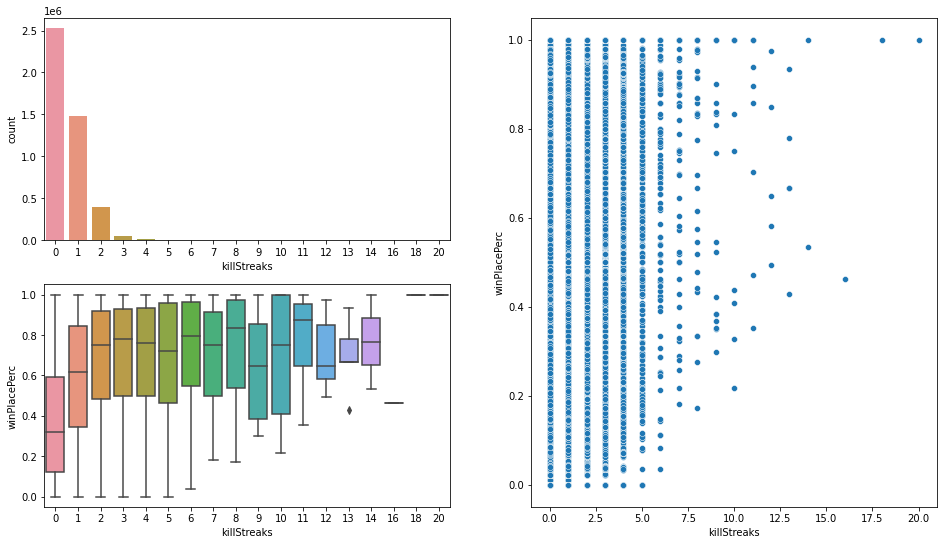

In [168]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'killStreaks', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'killStreaks')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'killStreaks', y = 'winPlacePerc')
plt.show()

### (8) longestKill

킬과 킬 사이의 이동한 가장 긴 거리

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



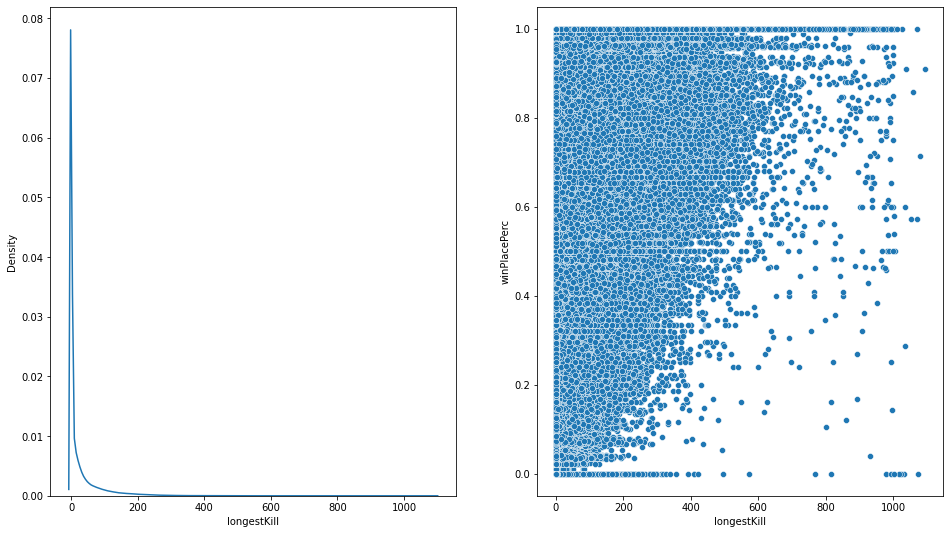

In [204]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'longestKill')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'longestKill', y = 'winPlacePerc')
plt.show()

### (9) roadKills

탈것으로 킬한 횟수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



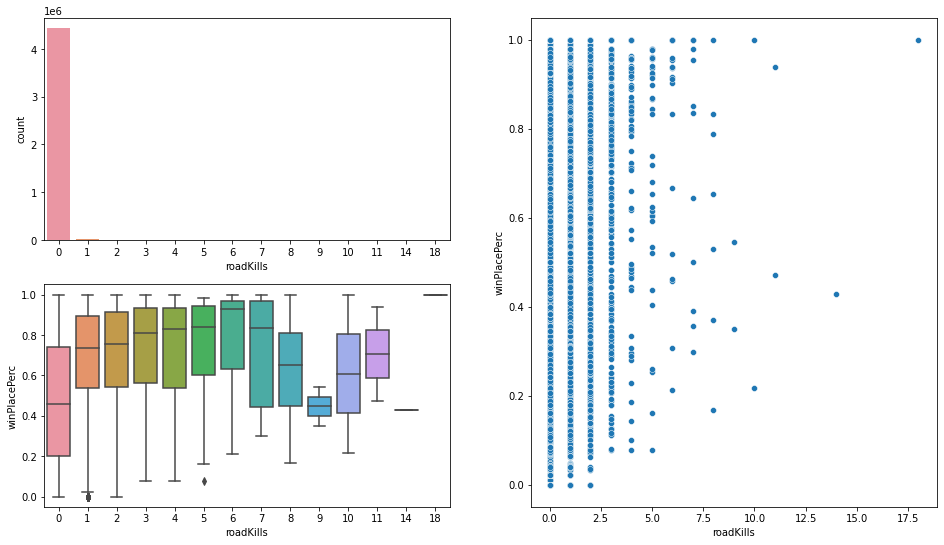

In [170]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'roadKills', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'roadKills')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'roadKills', y = 'winPlacePerc')
plt.show()

## - Heal 관련 feature

### (1) boosts

부스트 아이템 사용 횟수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



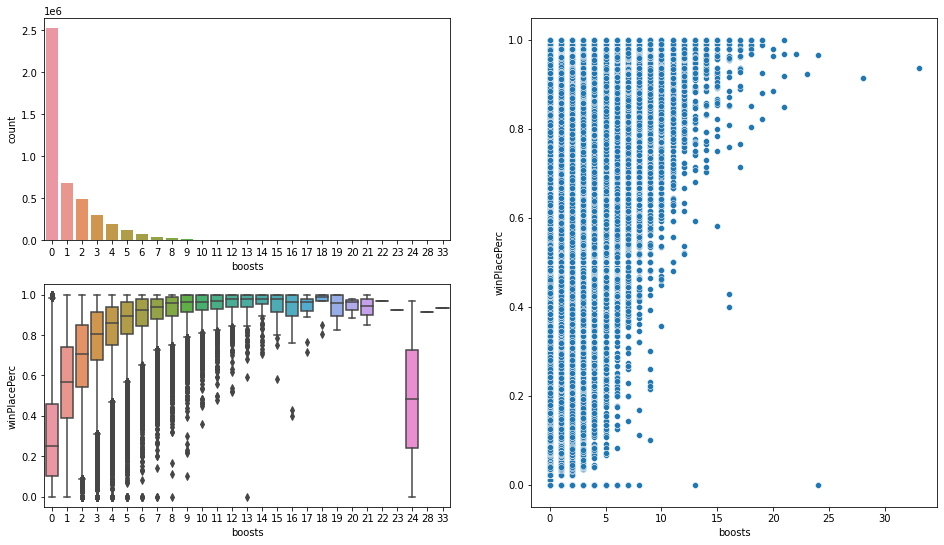

In [171]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'boosts', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'boosts')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'boosts', y = 'winPlacePerc')
plt.show()

### (2) heals

힐링 아이템 사용 횟수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



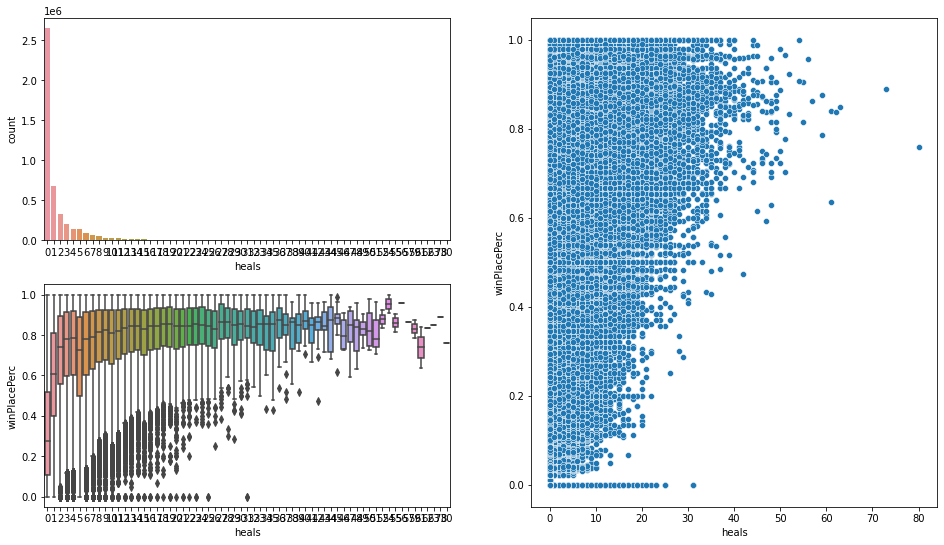

In [172]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'heals', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'heals')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'heals', y = 'winPlacePerc')
plt.show()

## - Assist 관련 feature

### (1) assists

아군이 킬했을 때 같이 데미지를 넣은 수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



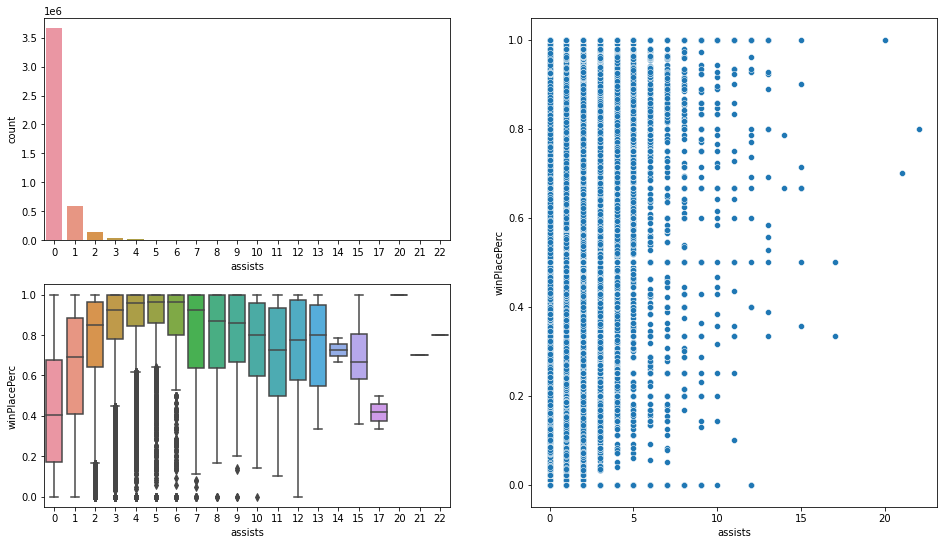

In [173]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'assists', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'assists')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'assists', y = 'winPlacePerc')
plt.show()

### (2) revives 

아군 부활 횟수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



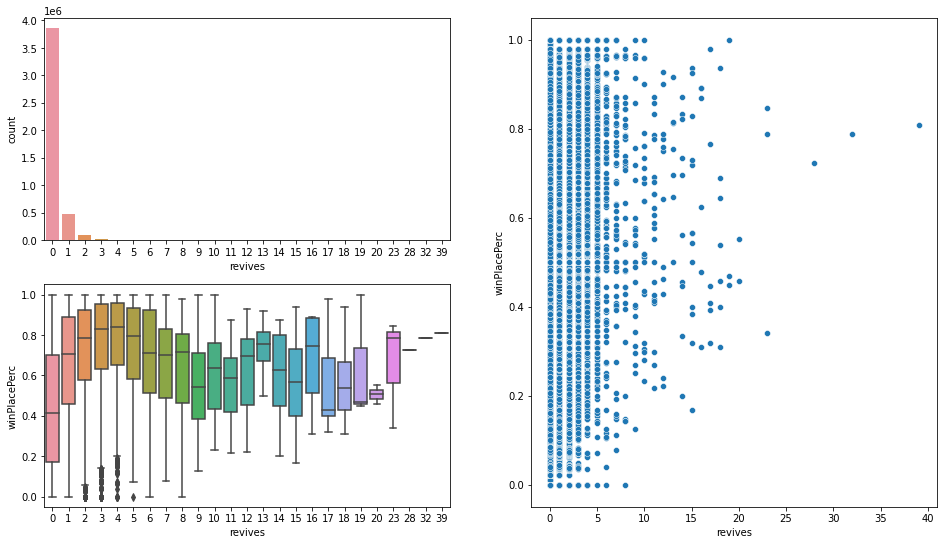

In [174]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'revives', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'revives')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'revives', y = 'winPlacePerc')
plt.show()

## - farming 관련 feature (1개)

### (1) weaponsAcquired 

얻은 무기의 수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



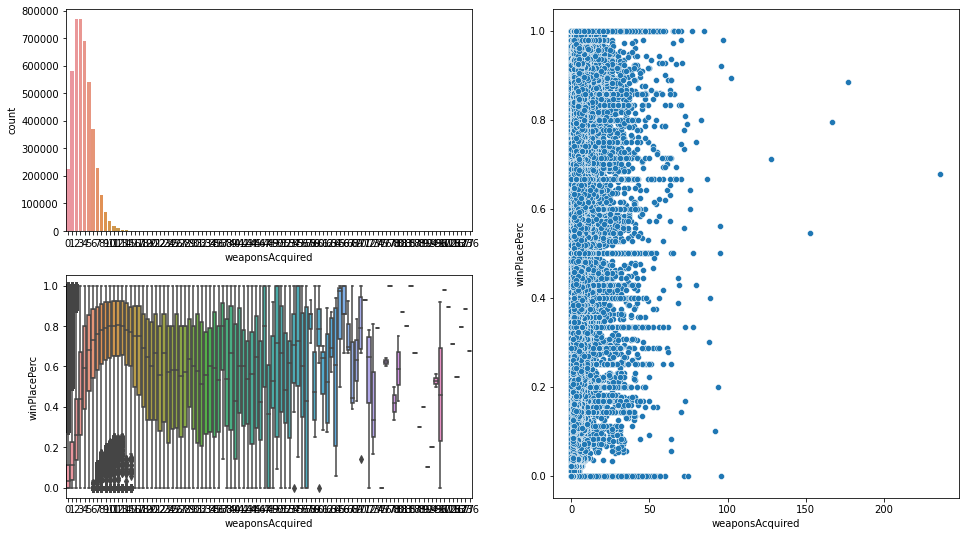

In [175]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'weaponsAcquired', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'weaponsAcquired')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'weaponsAcquired', y = 'winPlacePerc')
plt.show()

## - Activity 관련 feature (3개)

### (1) rideDistance

탈것으로 이동한 총 거리

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



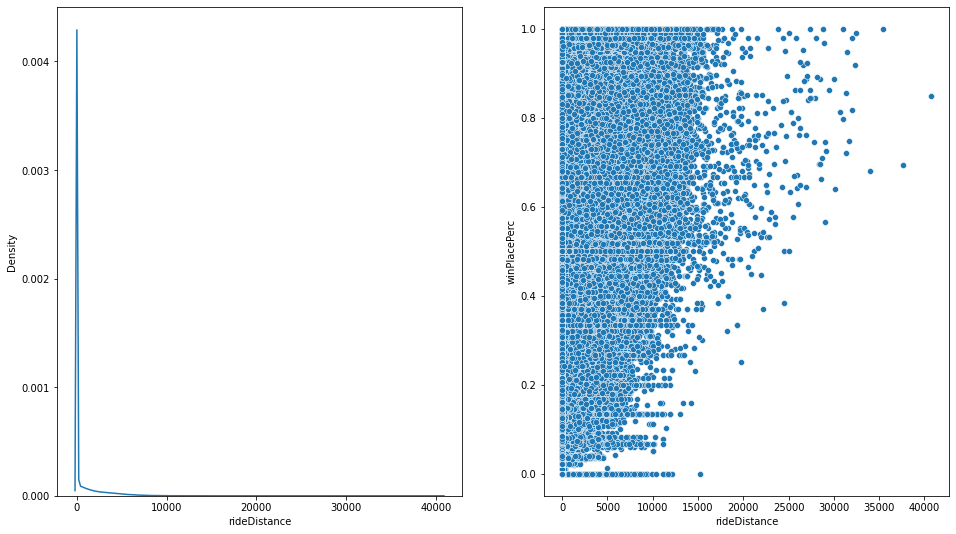

In [203]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'rideDistance')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'rideDistance', y = 'winPlacePerc')
plt.show()

### (2) swimDistance

수영한 총 거리

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



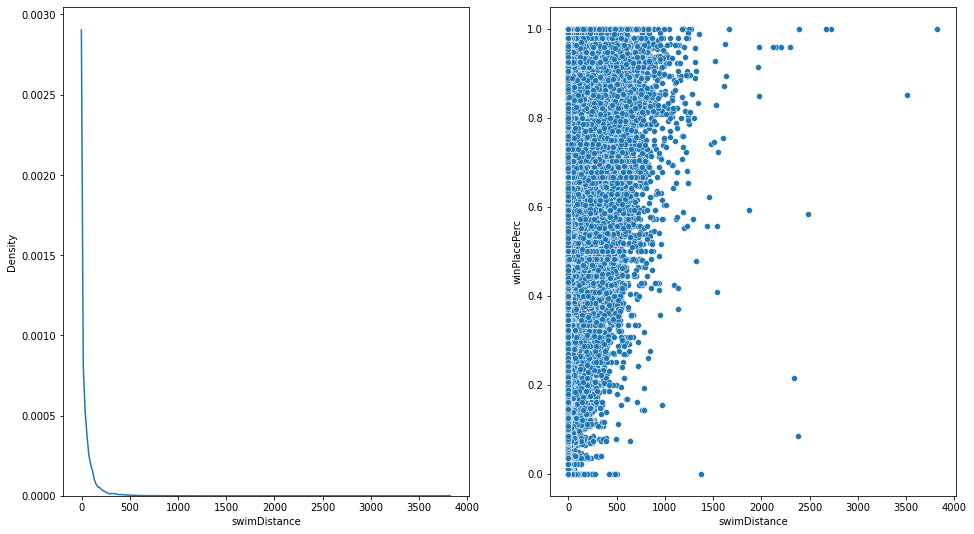

In [202]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'swimDistance')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'swimDistance', y = 'winPlacePerc')
plt.show()

### (3) walkDistance

걸어간 총 거리

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



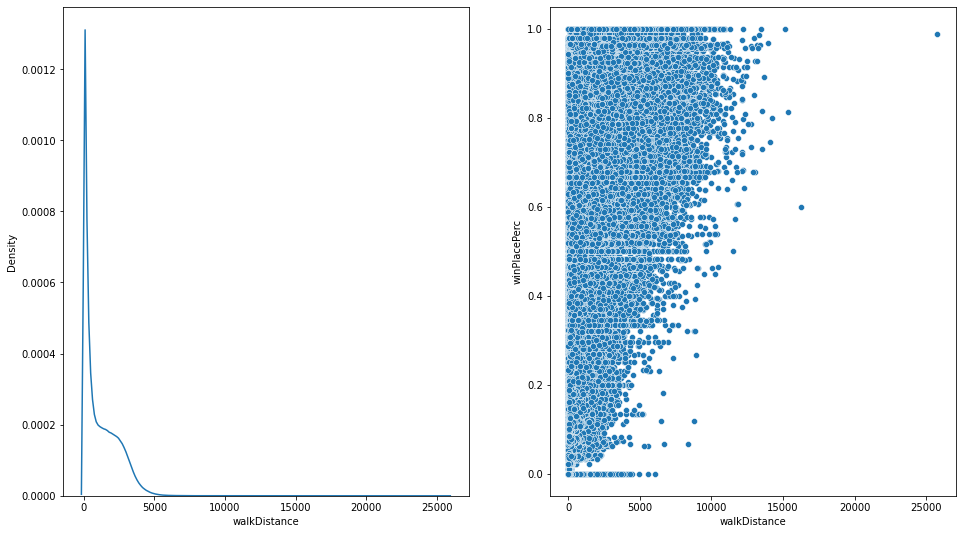

In [201]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'walkDistance')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'walkDistance', y = 'winPlacePerc')
plt.show()

## - play에 영향을 주는 특이한 변수 관련 feature (2개)

### (1) teamKills

팀킬 횟수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



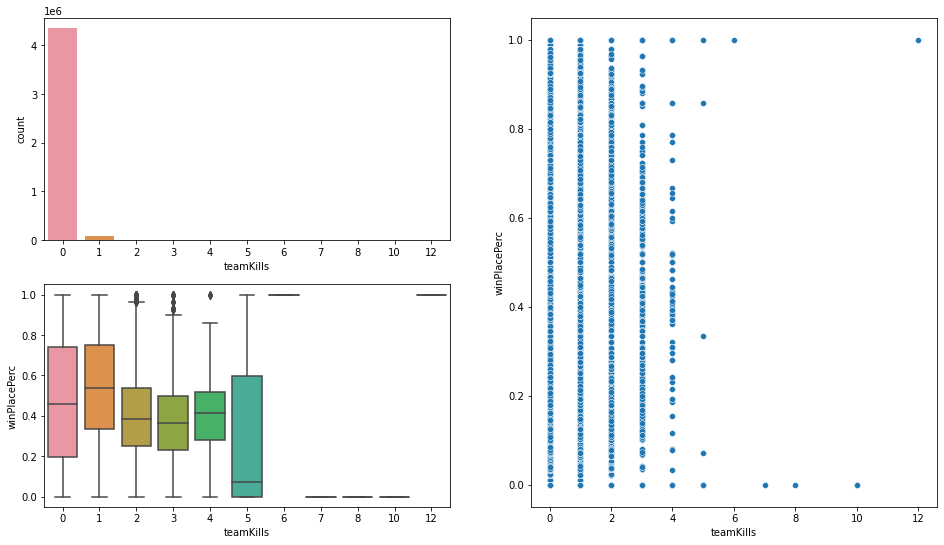

In [177]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'teamKills', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'teamKills')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'teamKills', y = 'winPlacePerc')
plt.show()

### (2) vehicleDestroys

차량 폭파 횟수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



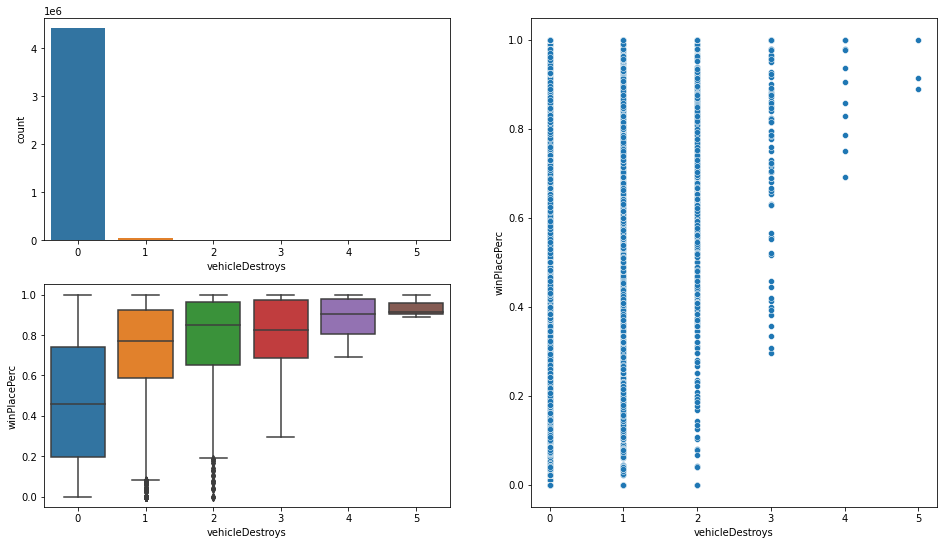

In [178]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'vehicleDestroys', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'vehicleDestroys')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'vehicleDestroys', y = 'winPlacePerc')
plt.show()

## - 이외의 game 관련 feature (6개)

### (1) matchDuration

매치의 시간 (초 단위)

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



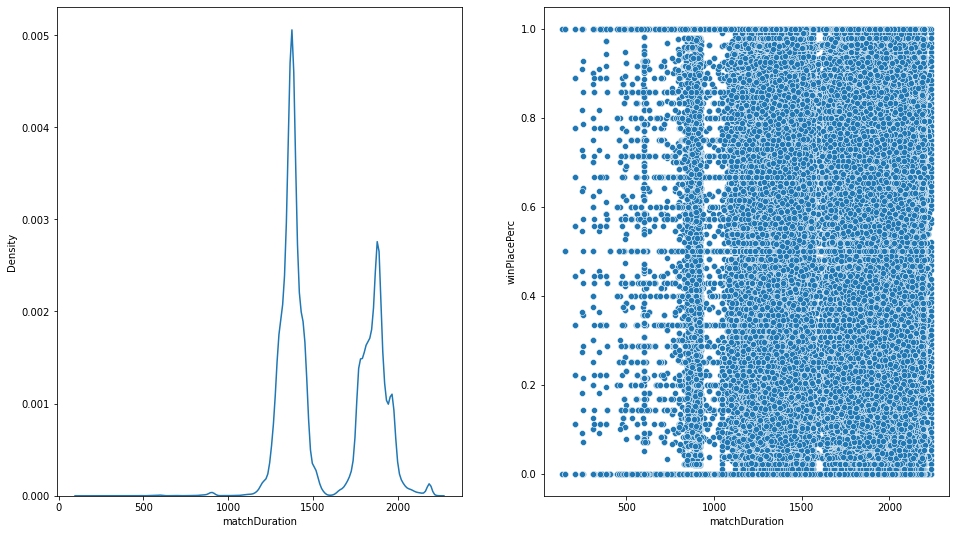

In [200]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'matchDuration')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'matchDuration', y = 'winPlacePerc')
plt.show()

### (2) matchType

매치 타입 “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; 
나머지는 이벤트 또는 커스텀 매치

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



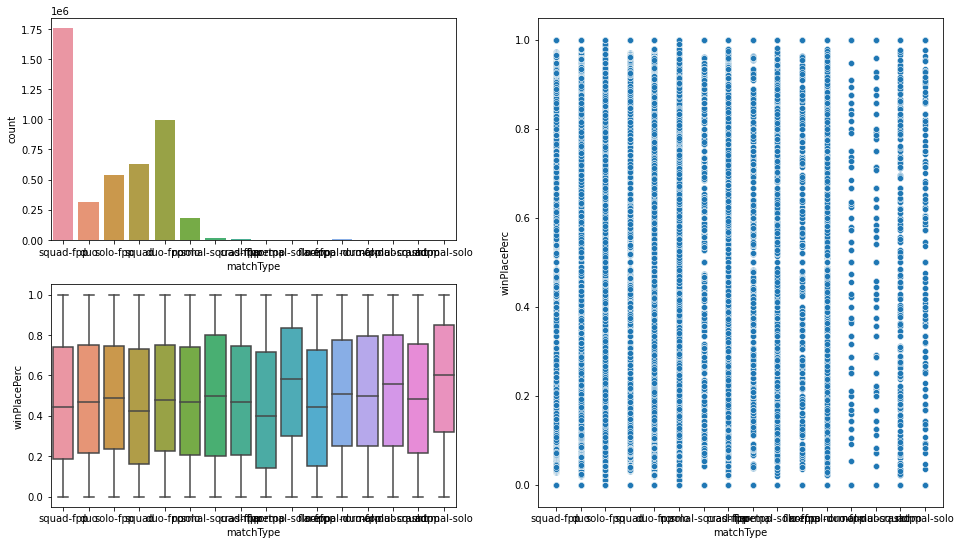

In [180]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'matchType', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'matchType')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'matchType', y = 'winPlacePerc')
plt.show()

### (3) maxPlace 

매치 내에서 최악의 등수

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



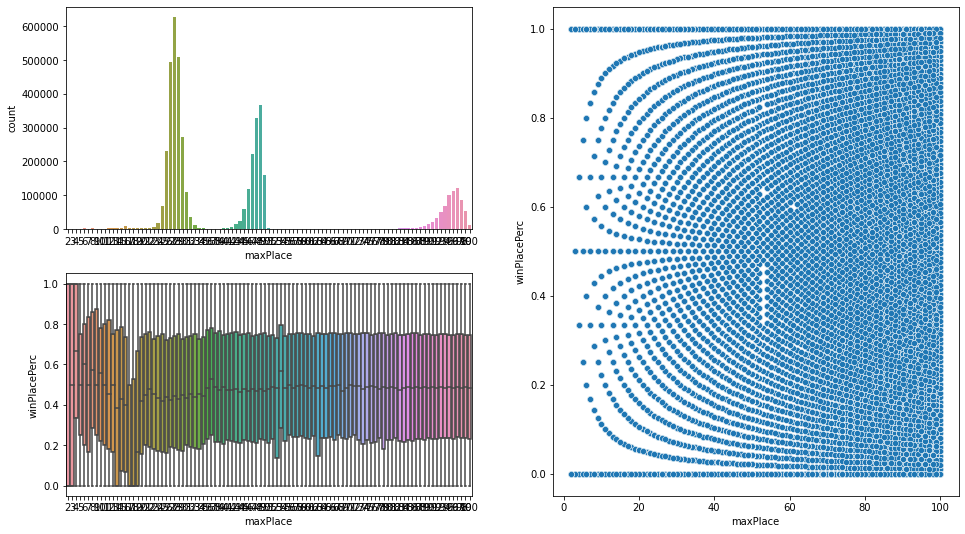

In [182]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'maxPlace', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'maxPlace')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'maxPlace', y = 'winPlacePerc')
plt.show()

### (4) numGroups (= maxPlace)

게임 내 총 그룹 수 (솔로 -> 듀오 -> 스쿼드로 갈 수록 줄어듦)

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



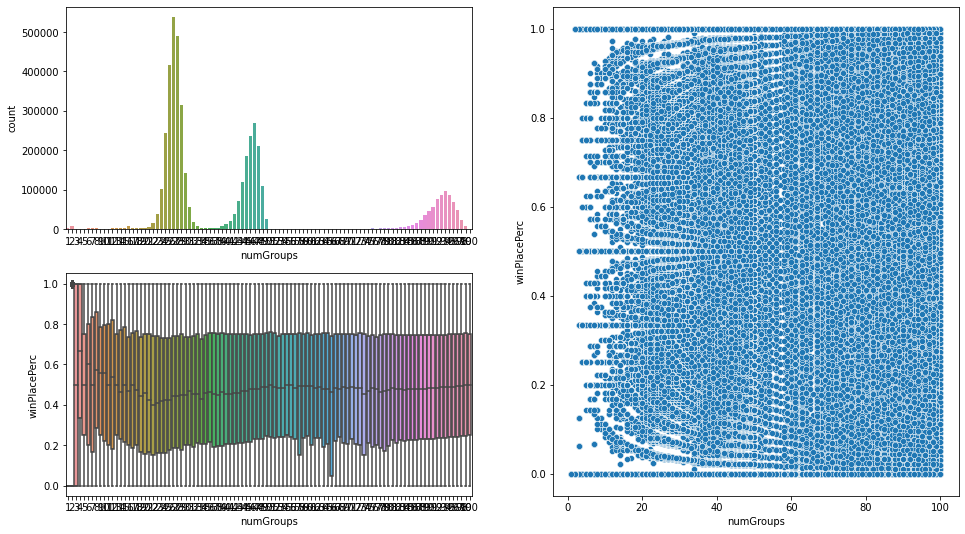

In [183]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(2,2,3)
sns.boxplot(data = train, x = 'numGroups', y = 'winPlacePerc')

plt.subplot(2,2,1)
sns.countplot(data = train, x = 'numGroups')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'numGroups', y = 'winPlacePerc')
plt.show()

### (5) rankPoints

랭킹 ELO의 개념

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



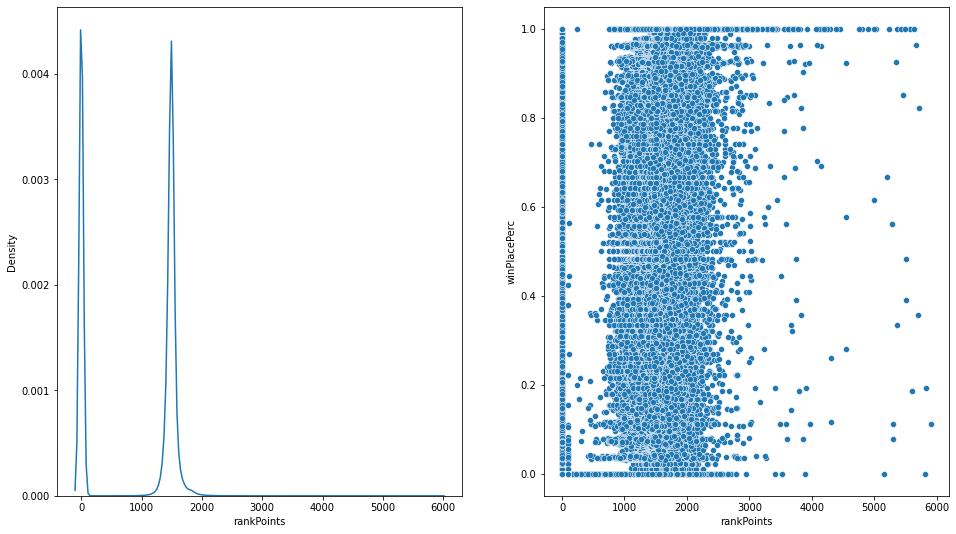

In [199]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'rankPoints')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'rankPoints', y = 'winPlacePerc')
plt.show()

### (6) winPoints

승리 횟수로 판단한 ELO의 개념

count    4.446965e+06
mean     2.338150e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64 

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



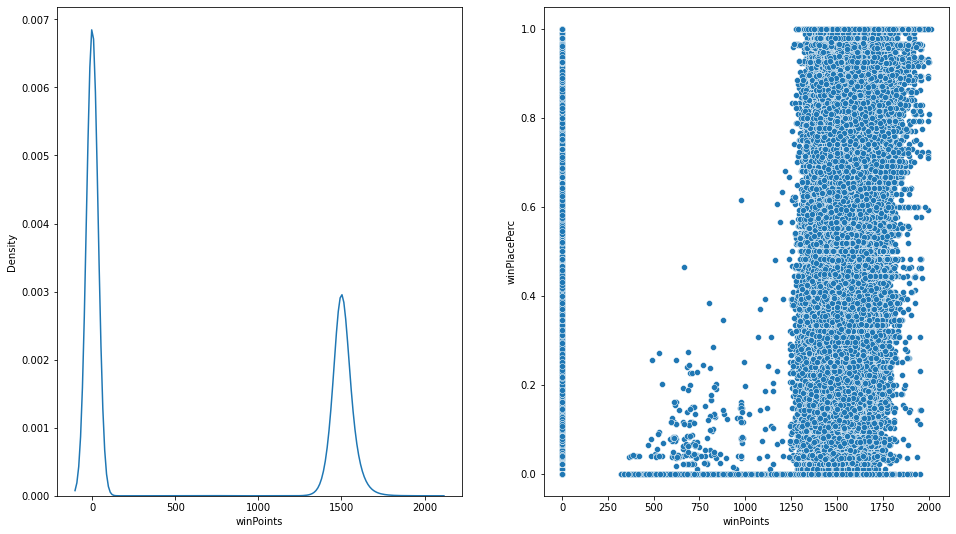

In [198]:
print(train.assists.describe(),'\n\n','~'*90,'\n')

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(data = train, x = 'winPoints')

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'winPoints', y = 'winPlacePerc')
plt.show()

### - 불필요한 컬럼 2차 제거

In [35]:
#maxPlace와 numGroups는 같으므로 maxPlace 제거
train = train.drop(['maxPlace'],axis=1)
test = test.drop(['maxPlace'],axis=1)

In [36]:
a = pd.get_dummies(train['matchType'])
a.value_counts().to_frame()

0
crashfpp crashtpp duo duo-fpp flarefpp flaretpp normal-duo normal-duo-fpp normal-solo normal-solo-fpp normal-squad normal-squad-fpp solo solo-fpp squad squad-fpp         
0        0        0   0       0        0        0          0              0           0               0            0                0    0        0     1          1756186
                      1       0        0        0          0              0           0               0            0                0    0        0     0           996691
                      0       0        0        0          0              0           0               0            0                0    0        1     0           626526
                                                                                                                                         1        0     0           536761
                  1   0       0        0        0          0              0           0               0            0                0    0        0     0           313591
                  0   0       0        0        0          0              0           0               0            0                1    0        0     0           181943
                                                                                                                   1                0    0        0     0            17174
1        0        0   0       0        0        0          0              0           0               0            0                0    0        0     0             6287
0        0        0   0       0        0        0          1              0           0               0            0                0    0        0     0             5489
                                       1        0          0              0           0               0            0                0    0        0     0             2505
                                       0        0          0              0           1               0            0                0    0        0     0             1682
                              1        0        0          0              0           0               0            0                0    0        0     0              718
                              0        0        0          0              0           0               1            0                0    0        0     0              516
         1        0   0       0        0        0          0              0           0               0            0                0    0        0     0              371
         0        0   0       0        0        0          0              1           0               0            0                0    0        0     0              326
                                                1          0              0           0               0            0                0    0        0     0              199

In [ ]:
#이상치 찾기

sns.distplot(x = train['walkDistance'], hist =True, kde = False, rug = True, bins = 20)

In [ ]:
#피쳐 간 상관관계 분석
    
    

In [ ]:
#변수 재분류 및 병합(boost + heal , 이동거리 모두 합치기)



# 4. 데이터 전처리

# 5. 모델링 & 평가

In [ ]:
X = train.drop('winPlacePerc',axis=1)
y = train['winPlacePerc']

In [ ]:
model = LGBMRegressor()
model.fit(X,y)
pred = model.predict(test)

# 6. 결과